## Data Understanding

This project uses three datasets from the City of Chicago traffic crash database:

1. Crash dataset – contains details about crash events and environmental conditions.
2. Vehicle dataset – contains details about vehicles involved in crashes.
3. People dataset – contains information about drivers and passengers involved in crashes.

The purpose of this section is to understand dataset structure, key variables, missing values, and early patterns that may influence crash causes.


In [390]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_ind
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from xgboost import XGBClassifier


sns.set(style="whitegrid")


In [391]:
# Loading the dataset

crashes = pd.read_csv("data/Traffic_Crashes_-_Crashes.csv.gz")
vehicles = pd.read_csv("data/Traffic_Crashes_-_Vehicles.csv.gz")
people = pd.read_csv("data/Traffic_Crashes_-_People.csv.gz")

crashes.shape, vehicles.shape, people.shape


### Crashes dataset understanding 

In [392]:
# Display all column names
crashes.columns


Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [393]:
# shows column names, data types, non-null counts
crashes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54959 entries, 0 to 54958
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                54959 non-null  object 
 1   CRASH_DATE_EST_I               3503 non-null   object 
 2   CRASH_DATE                     54959 non-null  object 
 3   POSTED_SPEED_LIMIT             54959 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         54959 non-null  object 
 5   DEVICE_CONDITION               54959 non-null  object 
 6   WEATHER_CONDITION              54959 non-null  object 
 7   LIGHTING_CONDITION             54959 non-null  object 
 8   FIRST_CRASH_TYPE               54959 non-null  object 
 9   TRAFFICWAY_TYPE                54959 non-null  object 
 10  LANE_CNT                       6 non-null      float64
 11  ALIGNMENT                      54959 non-null  object 
 12  ROADWAY_SURFACE_COND           54959 non-null 

In [394]:
# Exploring categorical columns
print(crashes['WEATHER_CONDITION'].value_counts())
print(crashes['CRASH_TYPE'].value_counts())


CLEAR                       44097
UNKNOWN                      4525
RAIN                         2825
SNOW                         1751
CLOUDY/OVERCAST              1379
OTHER                         200
FREEZING RAIN/DRIZZLE          74
BLOWING SNOW                   42
SLEET/HAIL                     40
FOG/SMOKE/HAZE                 22
SEVERE CROSS WIND GATE          3
BLOWING SAND, SOIL, DIRT        1
Name: WEATHER_CONDITION, dtype: int64
NO INJURY / DRIVE AWAY              39272
INJURY AND / OR TOW DUE TO CRASH    15687
Name: CRASH_TYPE, dtype: int64


In [395]:
# Checking for missing values
crashes.isnull().sum()


CRASH_RECORD_ID                      0
CRASH_DATE_EST_I                 51456
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         54953
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       2505
CRASH_TYPE                           0
INTERSECTION_RELATED_I           42355
NOT_RIGHT_OF_WAY_I               52823
HIT_AND_RUN_I                    37623
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     0
STREET_NAME              

### Vehicle dataset understanding 

In [396]:
# shows column names, data types, non-null counts
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111727 entries, 0 to 111726
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CRASH_UNIT_ID             111727 non-null  int64  
 1   CRASH_RECORD_ID           111727 non-null  object 
 2   CRASH_DATE                111727 non-null  object 
 3   UNIT_NO                   111727 non-null  int64  
 4   UNIT_TYPE                 111651 non-null  object 
 5   NUM_PASSENGERS            16020 non-null   float64
 6   VEHICLE_ID                108262 non-null  float64
 7   CMRC_VEH_I                2030 non-null    object 
 8   MAKE                      108262 non-null  object 
 9   MODEL                     108262 non-null  object 
 10  LIC_PLATE_STATE           98787 non-null   object 
 11  VEHICLE_YEAR              93284 non-null   float64
 12  VEHICLE_DEFECT            108262 non-null  object 
 13  VEHICLE_TYPE              108262 non-null  o

In [397]:
# Most common vehicle types
print(vehicles['VEHICLE_TYPE'].value_counts())

# Most common maneuvers
print(vehicles['MANEUVER'].value_counts())

# Most common vehicle use
print(vehicles['VEHICLE_USE'].value_counts())


PASSENGER                                 64499
SPORT UTILITY VEHICLE (SUV)               18820
UNKNOWN/NA                                 8823
PICKUP                                     4377
VAN/MINI-VAN                               4094
TRUCK - SINGLE UNIT                        1927
BUS OVER 15 PASS.                          1732
OTHER                                      1619
TRACTOR W/ SEMI-TRAILER                     935
BUS UP TO 15 PASS.                          524
MOTORCYCLE (OVER 150CC)                     356
SINGLE UNIT TRUCK WITH TRAILER              231
TRACTOR W/O SEMI-TRAILER                    122
MOPED OR MOTORIZED BICYCLE                  101
OTHER VEHICLE WITH TRAILER                   73
3-WHEELED MOTORCYCLE (2 REAR WHEELS)         12
ALL-TERRAIN VEHICLE (ATV)                     8
FARM EQUIPMENT                                5
RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)        3
AUTOCYCLE                                     1
Name: VEHICLE_TYPE, dtype: int64
STRAIGH

In [398]:
# checks for missing values
vehicles.isnull().sum()


CRASH_UNIT_ID                   0
CRASH_RECORD_ID                 0
CRASH_DATE                      0
UNIT_NO                         0
UNIT_TYPE                      76
                            ...  
CARGO_BODY_TYPE            110971
LOAD_TYPE                  111000
HAZMAT_OUT_OF_SERVICE_I    111000
MCS_OUT_OF_SERVICE_I       111004
HAZMAT_CLASS               111670
Length: 71, dtype: int64

### People dataset understanding 

In [399]:
people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [400]:
# shows column names, data types, non-null counts
people.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120061 entries, 0 to 120060
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              120061 non-null  object 
 1   PERSON_TYPE            120061 non-null  object 
 2   CRASH_RECORD_ID        120061 non-null  object 
 3   VEHICLE_ID             116677 non-null  float64
 4   CRASH_DATE             120061 non-null  object 
 5   SEAT_NO                23368 non-null   float64
 6   CITY                   87732 non-null   object 
 7   STATE                  89192 non-null   object 
 8   ZIPCODE                83249 non-null   object 
 9   SEX                    117848 non-null  object 
 10  AGE                    86279 non-null   float64
 11  DRIVERS_LICENSE_STATE  71646 non-null   object 
 12  DRIVERS_LICENSE_CLASS  56520 non-null   object 
 13  SAFETY_EQUIPMENT       119761 non-null  object 
 14  AIRBAG_DEPLOYED        116809 non-nu

In [401]:
# Categorical Summary
print(people['SEX'].value_counts())
print(people['PERSON_TYPE'].value_counts())
print(people['INJURY_CLASSIFICATION'].value_counts())
print(people['SAFETY_EQUIPMENT'].value_counts())


M    62722
F    44280
X    10846
Name: SEX, dtype: int64
DRIVER                 93312
PASSENGER              23368
PEDESTRIAN              1624
BICYCLE                 1584
NON-MOTOR VEHICLE        160
NON-CONTACT VEHICLE       13
Name: PERSON_TYPE, dtype: int64
NO INDICATION OF INJURY     107043
NONINCAPACITATING INJURY      6729
REPORTED, NOT EVIDENT         5296
INCAPACITATING INJURY          927
FATAL                           53
Name: INJURY_CLASSIFICATION, dtype: int64
USAGE UNKNOWN                                 67415
SAFETY BELT USED                              43892
NONE PRESENT                                   4644
HELMET NOT USED                                1371
SAFETY BELT NOT USED                            541
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      470
CHILD RESTRAINT - FORWARD FACING                415
CHILD RESTRAINT - TYPE UNKNOWN                  269
CHILD RESTRAINT - REAR FACING                   232
DOT COMPLIANT MOTORCYCLE HELMET                 215


In [402]:
# checks for missing values
people.isnull().sum()


PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                 3384
CRASH_DATE                    0
SEAT_NO                   96693
CITY                      32329
STATE                     30869
ZIPCODE                   36812
SEX                        2213
AGE                       33782
DRIVERS_LICENSE_STATE     48415
DRIVERS_LICENSE_CLASS     63541
SAFETY_EQUIPMENT            300
AIRBAG_DEPLOYED            3252
EJECTION                   1738
INJURY_CLASSIFICATION        13
HOSPITAL                 105315
EMS_AGENCY               111164
EMS_RUN_NO               118551
DRIVER_ACTION             23580
DRIVER_VISION             23627
PHYSICAL_CONDITION        23513
PEDPEDAL_ACTION          116736
PEDPEDAL_VISIBILITY      116743
PEDPEDAL_LOCATION        116738
BAC_RESULT                23615
BAC_RESULT VALUE         119954
CELL_PHONE_USE           120059
dtype: int64

## Data cleaning 
Before analysis, we clean the datasets to ensure accuracy and consistency:

Remove irrelevant columns – columns that have too many missing values or are not useful for modeling.

Handle missing values – fill missing numeric values with the median, and categorical values with "Unknown".

Convert data types – convert categorical columns to category type and dates to datetime.



This ensures our datasets are clean, consistent, and ready for merging and analysis.

### Crashes Dataset Cleaning

In [403]:
# Dropping unnecessary columns from crashes dataset
crashes.drop(columns=[
    'CRASH_DATE_EST_I', 'LANE_CNT', 'LATITUDE', 'LONGITUDE', 'LOCATION'
], inplace=True)


In [404]:
# Handling missing values in categorical columns
crashes['INTERSECTION_RELATED_I'].fillna('Unknown', inplace=True)
crashes['NOT_RIGHT_OF_WAY_I'].fillna('Unknown', inplace=True)
crashes['HIT_AND_RUN_I'].fillna('Unknown', inplace=True)
crashes['REPORT_TYPE'].fillna('Unknown', inplace=True)


In [405]:
# Converting categorical columns to 'category' dtype
categorical_crashes = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
                       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
                       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
                       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
                       'DAMAGE', 'WORK_ZONE_TYPE', 'DOORING_I', 'WORK_ZONE_I']

for col in categorical_crashes:
    crashes[col] = crashes[col].astype('category')


### Vehicles Dataset Cleaning

In [406]:
# Dropping unnecessary columns from vehicles dataset
vehicles.drop(columns=[
    'CMRC_VEH_I', 'FIRE_I', 'HAZMAT_CLASS', 'MCS_OUT_OF_SERVICE_I',
    'HAZMAT_OUT_OF_SERVICE_I', 'LOAD_TYPE', 'CARGO_BODY_TYPE', 'MCS_REPORT_NO',
    'HAZMAT_REPORT_NO', 'HAZMAT_NAME'
], inplace=True)


In [407]:
# Handling missing values in vehicles dataset
vehicles['UNIT_TYPE'].fillna('Unknown', inplace=True)
vehicles['NUM_PASSENGERS'].fillna(0, inplace=True)
vehicles['VEHICLE_USE'].fillna('Unknown', inplace=True)
vehicles['OCCUPANT_CNT'].fillna(0, inplace=True)


In [408]:
# Converting categorical columns to 'category' dtype
categorical_vehicles = ['UNIT_TYPE', 'MAKE', 'MODEL', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I']
for col in categorical_vehicles:
    vehicles[col] = vehicles[col].astype('category')


### People Dataset Cleaning

In [409]:
# Dropping unnecessary columns from  dataset
people.drop(columns=[
    'SEAT_NO', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO',
    'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
    'BAC_RESULT VALUE', 'CELL_PHONE_USE'
], inplace=True)


In [410]:
# Handling missing values in  dataset
people['AGE'].fillna(people['AGE'].median(), inplace=True)
people['SEX'].fillna('Unknown', inplace=True)
people['DRIVERS_LICENSE_STATE'].fillna('Unknown', inplace=True)
people['DRIVERS_LICENSE_CLASS'].fillna('Unknown', inplace=True)
people['SAFETY_EQUIPMENT'].fillna('Unknown', inplace=True)
people['AIRBAG_DEPLOYED'].fillna('Unknown', inplace=True)
people['EJECTION'].fillna('Unknown', inplace=True)
people['INJURY_CLASSIFICATION'].fillna('Unknown', inplace=True)


In [411]:
# Converting categorical columns to 'category' dtype
categorical_people = ['PERSON_TYPE', 'SEX', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
                      'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION']
for col in categorical_people:
    people[col] = people[col].astype('category')


In [412]:
# Converting 'CRASH_DATE' to datetime format
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])
vehicles['CRASH_DATE'] = pd.to_datetime(vehicles['CRASH_DATE'])
people['CRASH_DATE'] = pd.to_datetime(people['CRASH_DATE'])


In [413]:
print(crashes.info())
print(crashes.isnull().sum().sum())  

print(vehicles.info())
print(vehicles.isnull().sum().sum())

print(people.info())
print(people.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54959 entries, 0 to 54958
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                54959 non-null  object        
 1   CRASH_DATE                     54959 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             54959 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         54959 non-null  category      
 4   DEVICE_CONDITION               54959 non-null  category      
 5   WEATHER_CONDITION              54959 non-null  category      
 6   LIGHTING_CONDITION             54959 non-null  category      
 7   FIRST_CRASH_TYPE               54959 non-null  category      
 8   TRAFFICWAY_TYPE                54959 non-null  category      
 9   ALIGNMENT                      54959 non-null  category      
 10  ROADWAY_SURFACE_COND           54959 non-null  category      
 11  ROAD_DEFECT    

### Merging datasets 
We merge them to create one dataset with all the information:

1. Merge Crashes with Vehicles on CRASH_RECORD_ID.

2. Merge the result with People on CRASH_RECORD_ID and VEHICLE_ID.

This gives us a complete dataset ready for analysis and modeling

In [414]:
# Merge crashes with vehicles
crash_vehicle = crashes.merge(
    vehicles,
    on='CRASH_RECORD_ID',
    how='left',  # keep all crashes even if vehicle info is missing
    suffixes=('_crash', '_vehicle')
)

print("Merged Crashes + Vehicles shape:", crash_vehicle.shape)


Merged Crashes + Vehicles shape: (111727, 103)


In [415]:
# Merge the above with people
full_data = crash_vehicle.merge(
    people,
    on=['CRASH_RECORD_ID', 'VEHICLE_ID'],
    how='left',
    suffixes=('', '_person')
)

print("Final merged dataset shape:", full_data.shape)


Final merged dataset shape: (134001, 121)


In [416]:
# Check missing values in the merged dataset
full_data.isnull().sum()


CRASH_RECORD_ID               0
CRASH_DATE_crash              0
POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
                          ...  
INJURY_CLASSIFICATION     13697
DRIVER_ACTION             37304
DRIVER_VISION             37365
PHYSICAL_CONDITION        37235
BAC_RESULT                37329
Length: 121, dtype: int64

### Data preparation 
- Choose important features and set the target variable.  (features (`X`) and target (`y`) for modeling. )
- Handle missing values: fill categorical with "Unknown" and numeric with median.  
- Convert categorical features to numeric using one-hot encoding.  
- Split the dataset into training and testing sets.

In [ ]:
# select features 
features = [
    'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
    'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
    'CRASH_TYPE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
    'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'DOORING_I',
    'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'
]

# X = features (inputs), y = target variable
X = full_data[features].copy()
y = full_data['MOST_SEVERE_INJURY']  # target


In [418]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [419]:
# Fill missing categorical values
X[categorical_cols] = X[categorical_cols].astype(str).fillna('Unknown')

# Fill missing numeric values
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Exploratory Data Analysis (EDA)

In [420]:
# Check the shape of the dataset
print(full_data.shape)

# Summary statistics for numeric columns
full_data.describe()

# Summary for categorical columns
full_data.describe(include='object')


(134001, 121)


,CRASH_RECORD_ID,REPORT_TYPE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,WORKERS_PRESENT_I,...,TRAILER2_WIDTH,VEHICLE_CONFIG,PERSON_ID,CITY,STATE,ZIPCODE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
count,134001,134001,134001,134001,134001,134001,134001,2586,4573,146,...,24,962,120304,87963,89422,83418,96697,96636,96766,96672
unique,54959,3,41373,38,37,4,1236,2,2,2,...,3,8,120061,2511,52,3093,20,14,12,4
top,25c7efc7347c450d7100bfb11dcd2ba6f74bfe45e04fab...,NOT ON SCENE (DESK REPORT),08/06/2025 05:01:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,W,WESTERN AVE,Y,Y,Y,...,>102,BUS,O2168535,CHICAGO,IL,60629,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED
freq,36,64590,36,52986,56326,49394,3906,1979,3863,129,...,9,318,5,62739,84005,3020,33141,53547,58598,95381


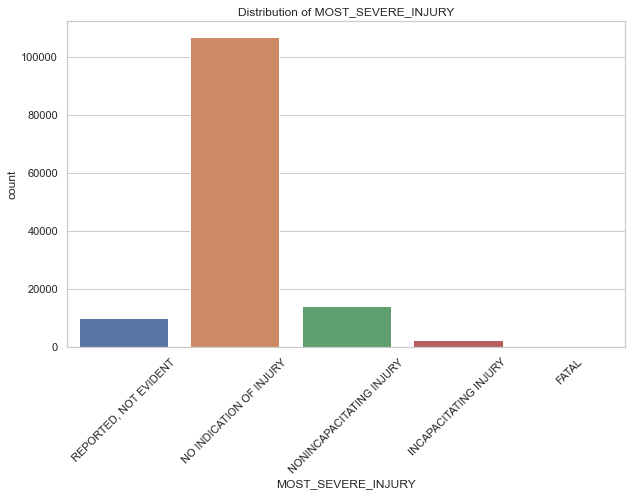

In [421]:
# Target Variable Analysis/ mostly severe injury distribution

plt.figure(figsize=(10,6))

sns.countplot(x='MOST_SEVERE_INJURY', data=full_data)

plt.title('Distribution of MOST_SEVERE_INJURY')
plt.xticks(rotation=45)   # Rotates labels
plt.show()


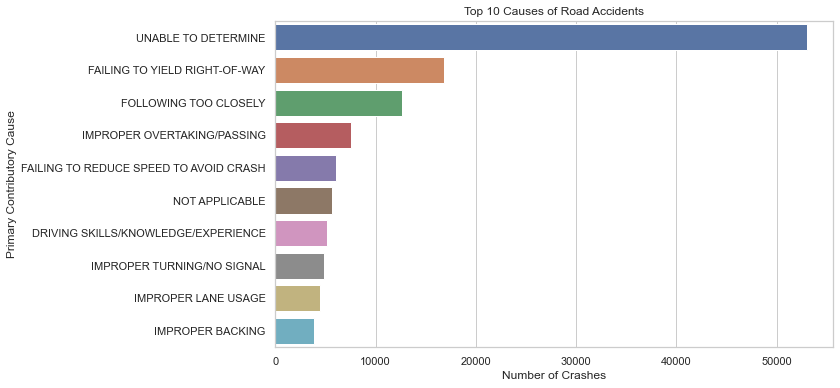

In [422]:
# Get top 10 causes of road accidents
top_causes = full_data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_causes.values, y=top_causes.index)

plt.title("Top 10 Causes of Road Accidents")
plt.xlabel("Number of Crashes")
plt.ylabel("Primary Contributory Cause")

plt.show()

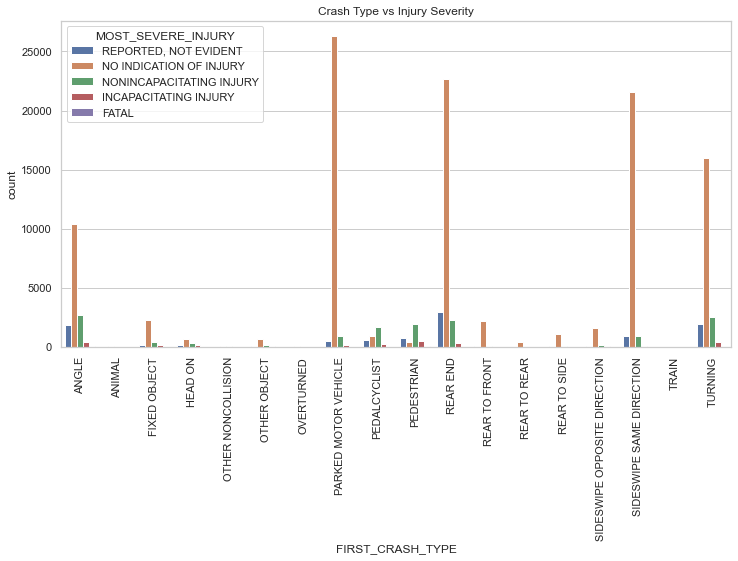

In [423]:
# Crash Type vs Injury Severity
plt.figure(figsize=(12,6))
sns.countplot(data=full_data, x='FIRST_CRASH_TYPE', hue='MOST_SEVERE_INJURY')
plt.xticks(rotation=90)
plt.title("Crash Type vs Injury Severity")
plt.show()


Text(0.5, 0, 'STREET NAME')

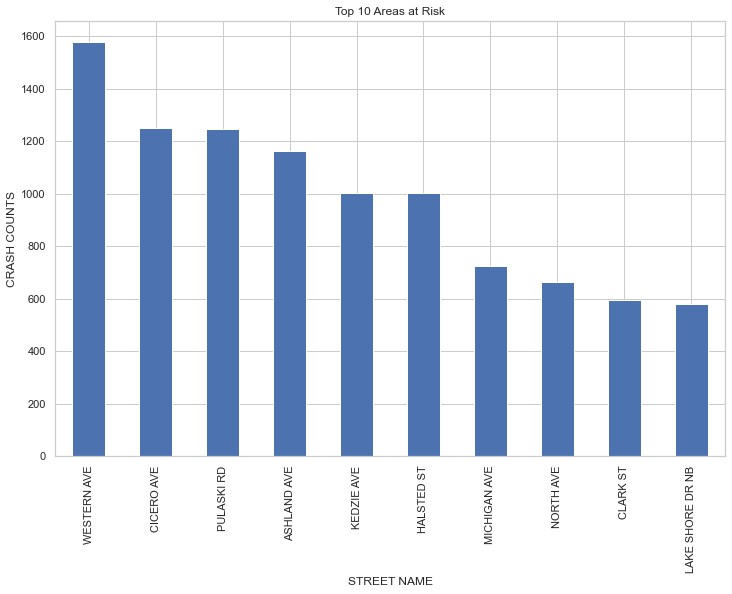

In [424]:
# Top 10 High-Risk Areas
# Identify which streets have the highest number of crashes.
top_10_risk_areas = crashes.STREET_NAME.value_counts().head(10)

# Bar plot showing top 10 streets with most crashes
top_10_risk_areas.plot(kind='bar', figsize=(12,8))
plt.title('Top 10 Areas at Risk')
plt.ylabel('CRASH COUNTS')
plt.xlabel('STREET NAME')